In [65]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
data = open('kafka.txt').read()
chars = list(set(data))
present_char = len(data)
unique_chars_length = len(chars)

In [11]:
print(present_char,unique_chars_length)

137629 81


In [14]:
id_2_char = dict((c,i) for c,i in enumerate(chars))
char_2_id = dict((i,c) for c,i in enumerate(chars))

In [17]:
def one_hot_encoder(char):
    vector = np.zeros(shape=[unique_chars_length])
    vector[char_2_id[char]] = 1
    return vector

In [95]:
traning_data = []

In [96]:
for char in data:
    traning_data.append(one_hot_encoder(char))

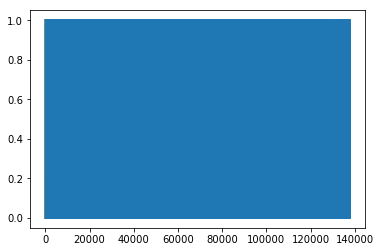

In [51]:
plt.plot(traning_data)

In [89]:
traning_data = np.asarray(traning_data)#.reshape(present_char,unique_chars_length)

In [29]:
#model parameters

In [146]:
learning_rate = 0.0001
num_neurons = 81
iterations = 1000
batch_size = 10
input_size =81
output_size = 81
series_length = 30
# present_char = len(data)
# unique_chars_length = len(chars)

In [147]:
tf.reset_default_graph()

In [148]:
X = tf.placeholder(shape = [None,series_length,input_size],dtype = tf.float32)

In [149]:
y = tf.placeholder(shape = [None,series_length,output_size],dtype = tf.float32)

In [150]:
cells = tf.contrib.rnn.OutputProjectionWrapper(tf.contrib.rnn.BasicRNNCell(num_units = num_neurons,activation = tf.nn.tanh),output_size = output_size)

In [151]:
outputs, states = tf.nn.dynamic_rnn(cells,X,dtype = tf.float32)

In [152]:
reduce_mean = tf.reduce_mean(tf.square(outputs - y))

In [153]:
optimize = tf.train.AdamOptimizer(learning_rate = learning_rate)

In [154]:
train = optimize.minimize(reduce_mean)

In [155]:
saver = tf.train.Saver()

In [156]:
init = tf.global_variables_initializer()

In [157]:
def get_next_batch():
    random_char =  random.choice(range(0,len(data)-(series_length-1)))
    x_batch_data = traning_data[random_char:random_char+series_length]
    y_batch_data = traning_data[random_char+1:random_char+series_length+1]
    return np.asarray(x_batch_data).reshape(-1,series_length,input_size), np.asarray(y_batch_data).reshape(-1,series_length,output_size)

In [158]:
with tf.Session() as sess:
    sess.run(init)
    for iteration in range(iterations): 
        x_batch, y_batch = get_next_batch()
        sess.run(train,feed_dict ={X:x_batch,y: y_batch})
        if iteration%100 == 0:
            mse = reduce_mean.eval(feed_dict = {X:x_batch,y:y_batch})
            print(iteration,"\tmse",mse)
        saver.save(sess,"./word_pred_demo")

0 	mse 0.031043213
100 	mse 0.023328885
200 	mse 0.019350136
300 	mse 0.016140712
400 	mse 0.015186316
500 	mse 0.013594231
600 	mse 0.013277956
700 	mse 0.012701958
800 	mse 0.013429612
900 	mse 0.011971306


In [159]:
test_inst = "this is my life song. taking ba"
test_data = []

In [160]:
for test in test_inst:
    test_data.append(one_hot_encoder(test))
    

In [161]:
x_test_data = test_data[0:30]
y_true = test_data[1:31]
x_test = np.asarray(x_test_data).reshape(-1,30,81)
y_test = np.asarray(y_true).reshape(-1,30,81)

In [162]:
with tf.Session() as sess:
    saver.restore(sess,"./word_pred_demo")
    y_pred = sess.run(outputs,feed_dict = {X: x_test})

INFO:tensorflow:Restoring parameters from ./word_pred_demo


In [185]:
m = list(y_pred[0])
ele = max(m[1])
index = list(m[1]).index(ele)
print(index)

1


In [189]:
list(y_test[0][1]).index(1)

58

In [188]:
y_test[0][1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [190]:
print(id_2_char[1],id_2_char[58])

e i


In [198]:
arr  =list(x_test[0][0]).index(1)


In [199]:
print(id_2_char[arr])

t
